In [1]:
library(tidyverse)
library(tidytext)
library(topicmodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
load("data/dtm_fin.Rda")

In [3]:

ru_lda = LDA(dtm_fin, k = 80, 
             method="Gibbs", 
             control=list(seed = 5478,
                          alpha=0.1,
                          delta=0.3))




In [4]:
save(ru_lda, file="data/ru_lda.Rda")

## Words in topics (beta)

Few things happen here:  

- list most probable words in topics
- build topic labels from few top words
- save top words per topic visualization for curiosity

In [5]:
# extract word probabilities in topics
ru_beta = tidy(ru_lda, matrix = "beta")

# get top 20 words per each topic
top_terms = ru_beta %>%
  group_by(topic) %>%
  top_n(20, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

In [6]:
# topic labels, top n words

n_words = 5

topic_labels = top_terms %>%
  group_by(topic) %>%
  top_n(n_words, beta) %>%
  summarise(label=paste(term, collapse=" ")) %>%
  mutate(label = paste(topic, label, sep="_"))

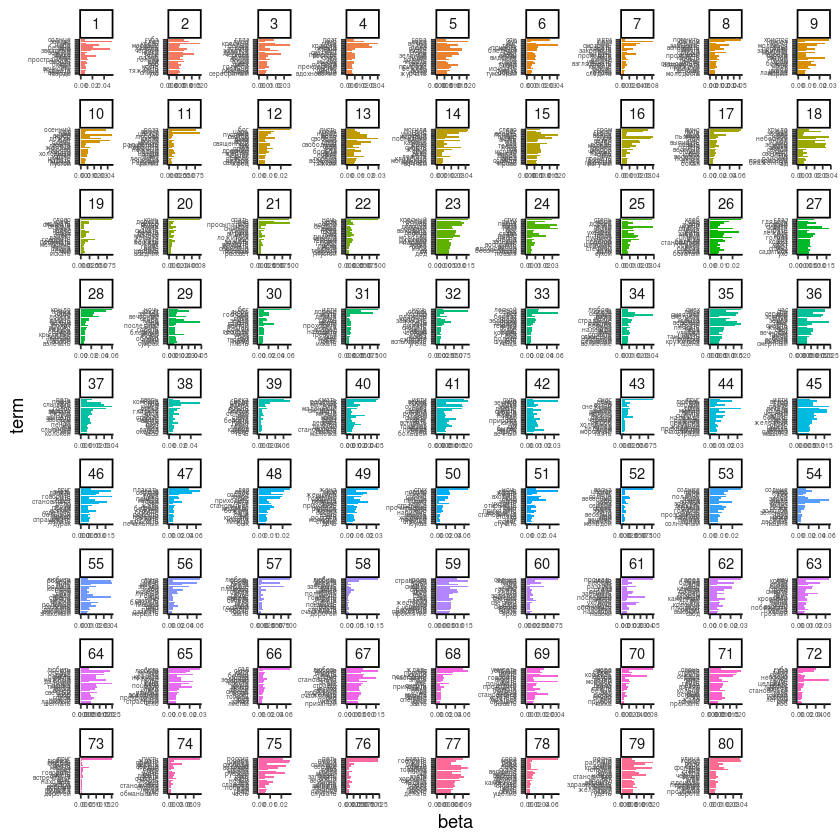

In [7]:
# plot top words per topic & save it
top_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() + 
  theme_classic() +
  theme(axis.text = element_text(size = 4))

ggsave("ru_topics80.png", width=20, height=14)

## Topics in documents (gamma)

- Extract probabilities of topics in documents
- Check distribution of topics over all corpus

In [8]:
ru_gamma = tidy(ru_lda, matrix = "gamma")



In [ ]:
print(topic_labels)

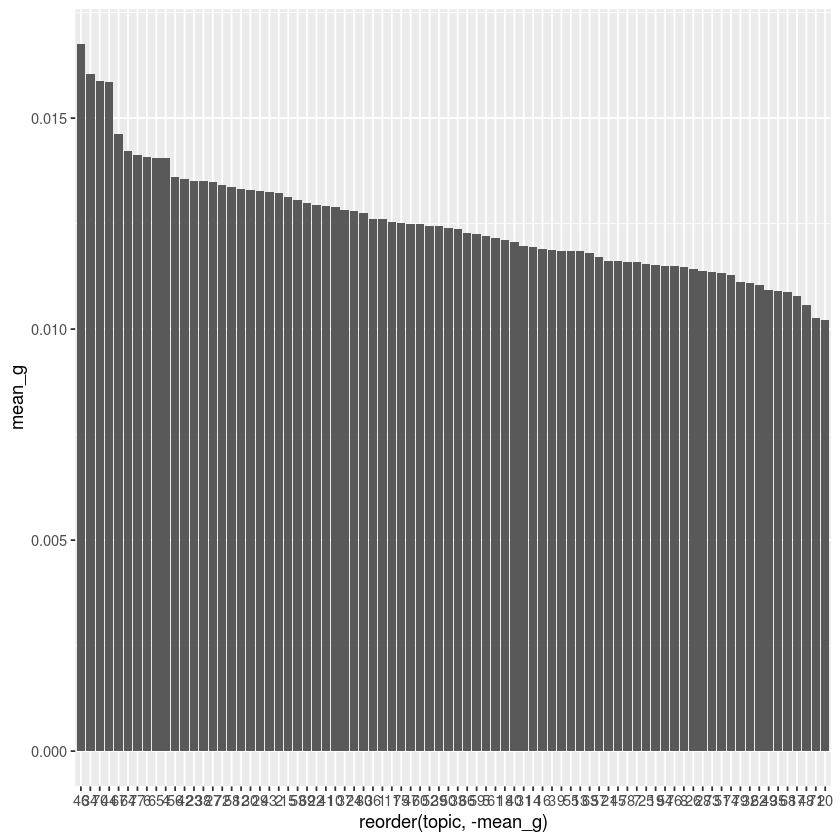

In [9]:
topic_probs = ru_gamma %>%
  group_by(topic) %>%
  summarise(mean_g = mean(gamma)) %>%
  arrange(-mean_g)  

top5_topics = topic_probs  %>% 
    left_join(topic_labels, by="topic")  %>% 
    top_n(5, mean_g)  %>% 
    pull(topic)

topic_probs  %>% 
  mutate(topic = as.numeric(topic))  %>% 
  ggplot(aes(reorder(topic, -mean_g), mean_g)) + geom_bar(stat="identity")



In [ ]:
## DONT save stuff for main analysis
#save(topic_labels, top_terms, top5_topics, ru_gamma, file="data/lda_output.Rda")

In [11]:
topic_probs  %>% 
  mutate(topic = as.numeric(topic))

topic,mean_g
<dbl>,<dbl>
46,0.01674534
34,0.01604127
70,0.01588179
44,0.01586197
67,0.01461173
64,0.01421393
77,0.01413237
6,0.01407914
65,0.01404819
